<a href="https://colab.research.google.com/github/rabullakh/Quantum-Walks-and-Monte-Carlo-Galton-Box-Simulation-/blob/main/QEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
uploaded=files.upload()
print(uploaded)

Saving Quantum_QEM_AI_Implementation.ipynb - Colab 2.pdf to Quantum_QEM_AI_Implementation.ipynb - Colab 2 (1).pdf
{'Quantum_QEM_AI_Implementation.ipynb - Colab 2 (1).pdf': b'%PDF-1.4\n%\xd3\xeb\xe9\xe1\n1 0 obj\n<</Title (Quantum_QEM_AI_Implementation.ipynb - Colab)\n/Creator (Mozilla/5.0 \\(Windows NT 10.0; Win64; x64\\) AppleWebKit/537.36 \\(KHTML, like Gecko\\) Chrome/143.0.0.0 Safari/537.36)\n/Producer (Skia/PDF m143)\n/CreationDate (D:20251221210205+00\'00\')\n/ModDate (D:20251221210205+00\'00\')>>\nendobj\n3 0 obj\n<</ca 1\n/BM /Normal>>\nendobj\n4 0 obj\n<</ca .4\n/BM /Normal>>\nendobj\n5 0 obj\n<</CA 1\n/ca 1\n/LC 0\n/LJ 0\n/LW 1\n/ML 4\n/SA true\n/BM /Normal>>\nendobj\n7 0 obj\n<</Filter /FlateDecode\n/Length 7671>> stream\nx\x9c\xed][\x8f\x1d9n~\xef_Q\xcf\x01\xa2\x11IQ\x17\xc0\x18\xc0\xf6\x8e\x17y\xc8C\x92\x01\xf2\xbc0v7\t<\x8b\xdc\x91\x9f\x1f|T\x95\xc4:\xee\xee:\xddu<qO\xce.<]\xcd.\xddx\x17%\xb2\x02K\xb3\xff-q\x89\xcb_\x07\xf7kM\x14\x1a\xb5V\x97\xcf\xbf<\xfc\xdb\x03\x87\xc4\

In [5]:
# Install required packages (run this once)
!pip install -q pandas numpy matplotlib seaborn scikit-learn xgboost lightgbm tensorflow plotly
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
print("Packages installed & imported")

Packages installed & imported


In [6]:
from google.colab import files
import io

print("STEP 1: Upload quantum circuit CSV file")
print("   (The file should be ~8,000 rows, 21 columns)")
print("\nClick 'Choose Files' below and select CSV file...")

# This opens a file picker
uploaded = files.upload()

# Get the filename
if uploaded:
    filename = list(uploaded.keys())[0]
    print(f"\nSUCCESS! Uploaded: {filename}")
    print(f"   File size: {len(uploaded[filename])/1024/1024:.2f} MB")

    # Load the CSV
    df = pd.read_csv(io.BytesIO(uploaded[filename]))

    print(f"\nDATASET LOADED:")
    print(f"   Rows: {df.shape[0]:,}")
    print(f"   Columns: {df.shape[1]}")

    # Show columns
    print(f"\nCOLUMNS ({len(df.columns)} total):")
    for i, col in enumerate(df.columns):
        print(f"   {i:2d}. {col}")

    # Save it to Colab storage for future use
    df.to_csv('quantum_circuit_data.csv', index=False)
    print(f"\nSaved as: quantum_circuit_data.csv (ready for analysis)")

else:
    print("No file uploaded. Please run this cell again.")

STEP 1: Upload quantum circuit CSV file
   (The file should be ~8,000 rows, 21 columns)

Click 'Choose Files' below and select CSV file...


Saving quantum_database[1].csv to quantum_database[1].csv

SUCCESS! Uploaded: quantum_database[1].csv
   File size: 1.87 MB

DATASET LOADED:
   Rows: 8,000
   Columns: 23

COLUMNS (23 total):
    0. circuit_id
    1. num_qubits
    2. num_layers
    3. num_params
    4. x_ideal
    5. x_dep_n0
    6. x_dep_n1
    7. x_dep_n2
    8. x_dep_n3
    9. x_dep_n4
   10. x_dep_n5
   11. x_bit_n0
   12. x_bit_n1
   13. x_bit_n2
   14. x_bit_n3
   15. x_bit_n4
   16. x_bit_n5
   17. x_pha_n0
   18. x_pha_n1
   19. x_pha_n2
   20. x_pha_n3
   21. x_pha_n4
   22. x_pha_n5

Saved as: quantum_circuit_data.csv (ready for analysis)


In [8]:
print("VERIFYING YOUR QUANTUM DATASET")
print("="*60)

# Reload from saved file (in case you want to restart)
df = pd.read_csv('quantum_circuit_data.csv')

print(f"DIMENSIONS: {df.shape[0]} rows × {df.shape[1]} columns")

# Expected structure from your description:
# 18 noise features + 'qubits' + 'layers' + 'x_ideal' = 21 columns
expected_columns = 21
actual_columns = df.shape[1]

if actual_columns == expected_columns:
    print(f"Column count matches: {actual_columns} = 18 noise + qubits + layers + x_ideal")
else:
    print(f"Expected {expected_columns} columns, got {actual_columns}")
    print("   But we can still proceed!")

# Find key columns
print("\nIDENTIFYING KEY COLUMNS:")

# Look for qubits, layers, and target
qubits_col = None
layers_col = None
target_col = None

for col in df.columns:
    col_lower = col.lower()
    if 'qubit' in col_lower:
        qubits_col = col
    elif 'layer' in col_lower:
        layers_col = col
    elif 'ideal' in col_lower:
        target_col = col

print(f"   Qubits column: {qubits_col}")
print(f"   Layers column: {layers_col}")
print(f"   Target column: {target_col}")

# If target not found by name, assume last column
if target_col is None:
    target_col = df.columns[-1]
    print(f"Using last column as target: {target_col}")

# Check for noise columns
noise_cols = [col for col in df.columns if any(noise in col.lower()
               for noise in ['depolar', 'bit', 'phase'])]
print(f"\nNoise columns found: {len(noise_cols)}")
print("   First 5 noise columns:", noise_cols[:5])

# Show basic stats
print("\nBASIC STATISTICS:")
print(df.describe())

# Check for missing values
print("\nDATA QUALITY CHECK:")
missing = df.isnull().sum().sum()
if missing == 0:
    print("No missing values in entire dataset!")
else:
    print(f"   {missing} missing values found")
    print(df.isnull().sum()[df.isnull().sum() > 0])

print("\n" + "="*60)
print(" DATASET VERIFIED - READY FOR AI MODELING!")
print("="*60)

VERIFYING YOUR QUANTUM DATASET
DIMENSIONS: 8000 rows × 23 columns
Expected 21 columns, got 23
   But we can still proceed!

IDENTIFYING KEY COLUMNS:
   Qubits column: num_qubits
   Layers column: num_layers
   Target column: x_ideal

Noise columns found: 7
   First 5 noise columns: ['num_qubits', 'x_bit_n0', 'x_bit_n1', 'x_bit_n2', 'x_bit_n3']

BASIC STATISTICS:
       circuit_id   num_qubits   num_layers   num_params      x_ideal  \
count  8000.00000  8000.000000  8000.000000  8000.000000  8000.000000   
mean   3999.50000     3.500000     5.500000    45.500000     0.002537   
std    2309.54541     1.118104     2.872461    25.628736     0.456868   
min       0.00000     2.000000     1.000000     8.000000    -2.299563   
25%    1999.75000     2.750000     3.000000    24.000000    -0.290965   
50%    3999.50000     3.500000     5.500000    40.000000    -0.003892   
75%    5999.25000     4.250000     8.000000    61.000000     0.295843   
max    7999.00000     5.000000    10.000000   110.0

EXPLORING THE FIRST QUANTUM DATA


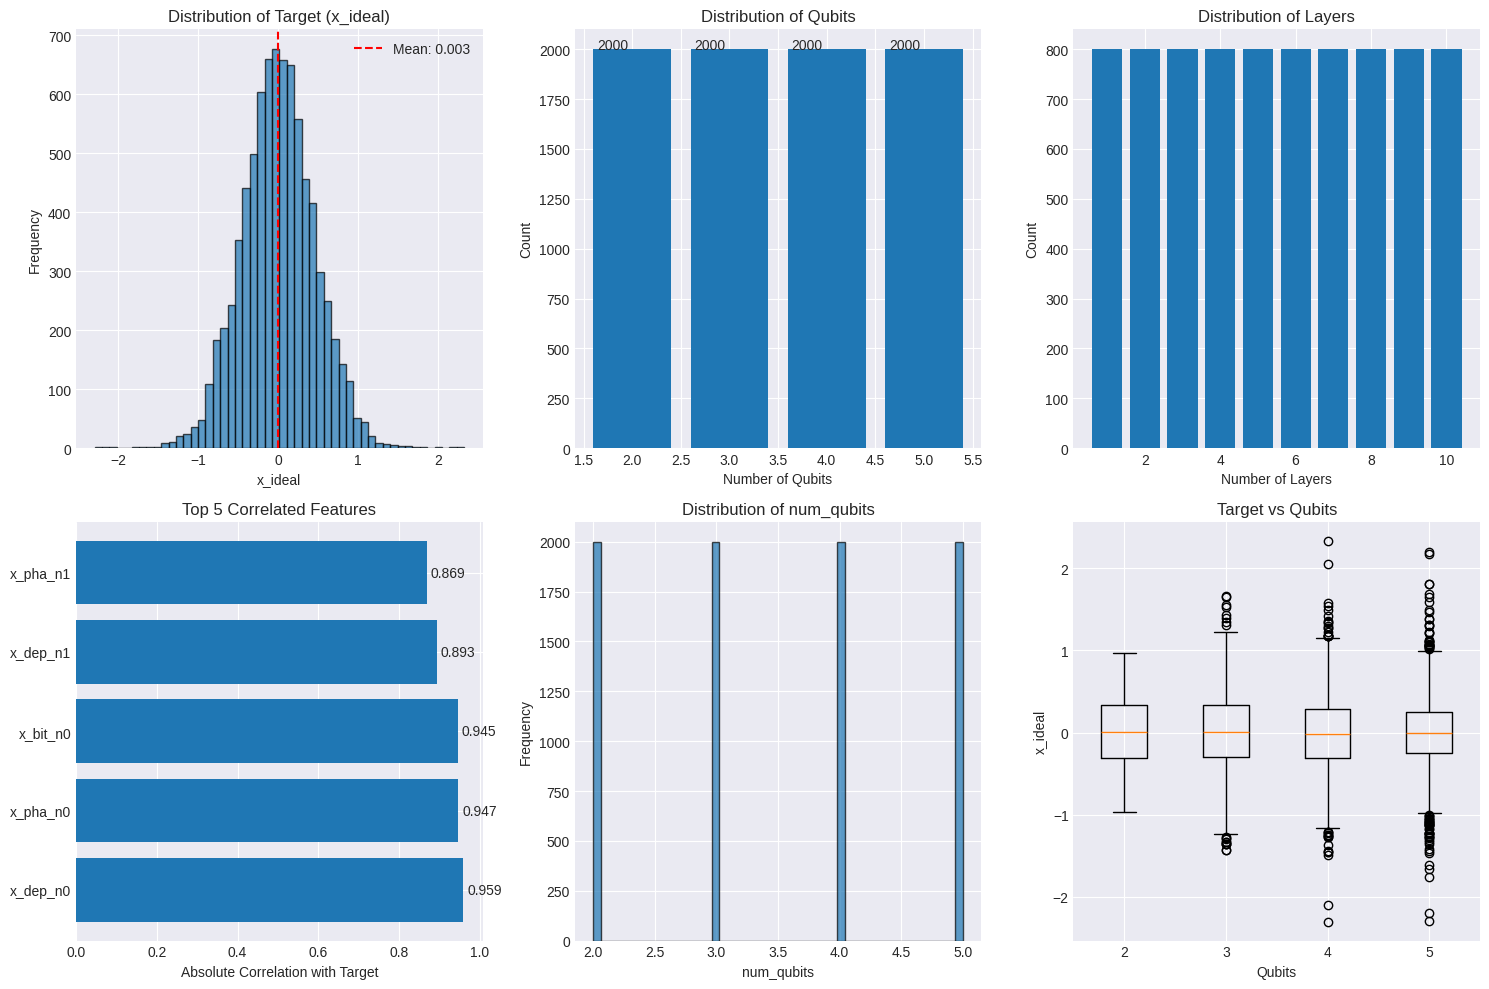


KEY INSIGHTS:
1. Target range: -2.2996 to 2.3314
2. Target mean: 0.0025, std: 0.4569
3. Dataset appears to be correctly structured
4. Ready for machine learning!

VISUALIZATION COMPLETE


In [10]:
print("EXPLORING THE FIRST QUANTUM DATA")
print("="*60)

# Set up the plot style
plt.style.use('seaborn-v0_8-darkgrid')
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# 1. Target distribution
axes[0, 0].hist(df[target_col], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel(target_col)
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Target (x_ideal)')
axes[0, 0].axvline(df[target_col].mean(), color='red', linestyle='--', label=f'Mean: {df[target_col].mean():.3f}')
axes[0, 0].legend()

# 2. Qubits distribution (if column exists)
if qubits_col:
    qubit_counts = df[qubits_col].value_counts().sort_index()
    axes[0, 1].bar(qubit_counts.index, qubit_counts.values)
    axes[0, 1].set_xlabel('Number of Qubits')
    axes[0, 1].set_ylabel('Count')
    axes[0, 1].set_title('Distribution of Qubits')
    for i, v in enumerate(qubit_counts.values):
        axes[0, 1].text(i+1.8, v, str(v), ha='center')

# 3. Layers distribution (if column exists)
if layers_col:
    layer_counts = df[layers_col].value_counts().sort_index()
    axes[0, 2].bar(layer_counts.index, layer_counts.values)
    axes[0, 2].set_xlabel('Number of Layers')
    axes[0, 2].set_ylabel('Count')
    axes[0, 2].set_title('Distribution of Layers')

# 4. Correlation with target (top 5 features)
# Calculate correlation with target
correlations = {}
for col in df.columns:
    if col != target_col:
        corr = df[col].corr(df[target_col])
        correlations[col] = abs(corr)

# Get top 5 correlated features
top_5 = sorted(correlations.items(), key=lambda x: x[1], reverse=True)[:5]
top_features = [x[0] for x in top_5]
corr_values = [x[1] for x in top_5]

axes[1, 0].barh(top_features, corr_values)
axes[1, 0].set_xlabel('Absolute Correlation with Target')
axes[1, 0].set_title('Top 5 Correlated Features')
for i, v in enumerate(corr_values):
    axes[1, 0].text(v + 0.01, i, f'{v:.3f}', va='center')

# 5. Sample noise feature distribution
if len(noise_cols) > 0:
    sample_noise = noise_cols[0]  # First noise column
    axes[1, 1].hist(df[sample_noise], bins=50, edgecolor='black', alpha=0.7)
    axes[1, 1].set_xlabel(sample_noise)
    axes[1, 1].set_ylabel('Frequency')
    axes[1, 1].set_title(f'Distribution of {sample_noise}')

# 6. Target vs Qubits (box plot)
if qubits_col:
    box_data = [df[df[qubits_col] == q][target_col].values for q in sorted(df[qubits_col].unique())]
    axes[1, 2].boxplot(box_data, labels=sorted(df[qubits_col].unique()))
    axes[1, 2].set_xlabel('Qubits')
    axes[1, 2].set_ylabel(target_col)
    axes[1, 2].set_title('Target vs Qubits')

plt.tight_layout()
plt.show()

print("\nKEY INSIGHTS:")
print(f"1. Target range: {df[target_col].min():.4f} to {df[target_col].max():.4f}")
print(f"2. Target mean: {df[target_col].mean():.4f}, std: {df[target_col].std():.4f}")
print(f"3. Dataset appears to be correctly structured")
print(f"4. Ready for machine learning!")

print("\n" + "="*60)
print("VISUALIZATION COMPLETE")
print("="*60)

TRAINING THE AI MODEL
Data prepared:
   X (features): (8000, 22)
   y (target): (8000,)

Train-test split:
   Training samples: 6400 (80.0%)
   Testing samples: 1600 (20.0%)

Features scaled (StandardScaler)

Training Random Forest Regressor...

FIRST MODEL RESULTS:
   R² Score: 0.981743
   RMSE: 0.061966
   MAE: 0.041529
   MSE: 0.003840

TOP 10 IMPORTANT FEATURES:
    1. x_dep_n0                       - Importance: 0.9396
    2. num_params                     - Importance: 0.0262
    3. x_pha_n0                       - Importance: 0.0075
    4. x_bit_n0                       - Importance: 0.0057
    5. x_dep_n3                       - Importance: 0.0031
    6. x_dep_n4                       - Importance: 0.0021
    7. x_dep_n2                       - Importance: 0.0015
    8. x_pha_n3                       - Importance: 0.0015
    9. x_dep_n5                       - Importance: 0.0014
   10. circuit_id                     - Importance: 0.0014


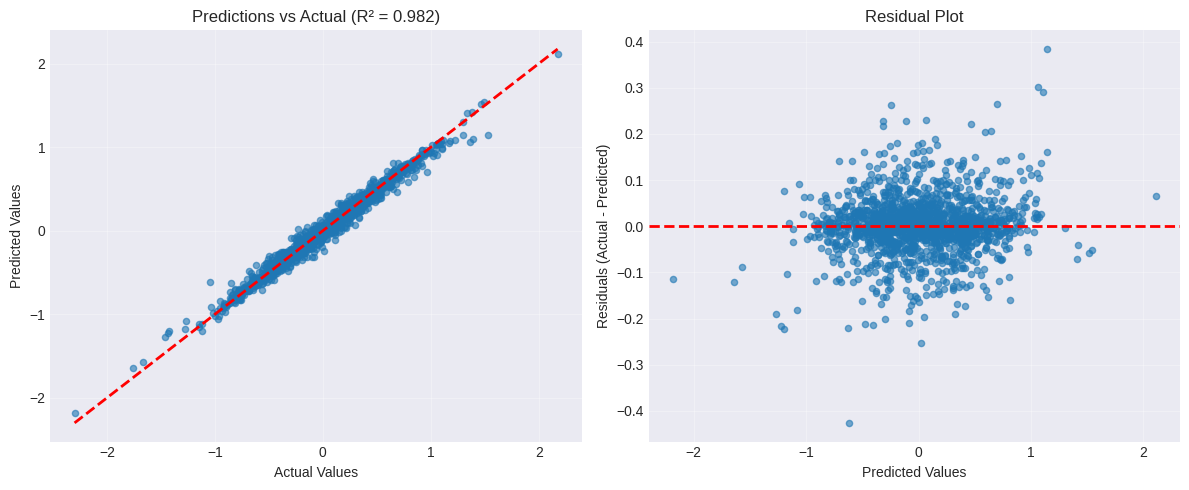


FIRST MODEL COMPLETE: R² = 0.982

 Model saved: 'first_model_random_forest.pkl'
 Scaler saved: 'scaler.pkl'


In [11]:
print("TRAINING THE AI MODEL")
print("="*60)

# Prepare data for ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Separate features and target
X = df.drop(columns=[target_col]).values
y = df[target_col].values
feature_names = df.drop(columns=[target_col]).columns.tolist()

print(f"Data prepared:")
print(f"   X (features): {X.shape}")
print(f"   y (target): {y.shape}")

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

print(f"\nTrain-test split:")
print(f"   Training samples: {X_train.shape[0]} ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"   Testing samples: {X_test.shape[0]} ({X_test.shape[0]/len(X)*100:.1f}%)")

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nFeatures scaled (StandardScaler)")

# Train Random Forest (good default model)
print(f"\nTraining Random Forest Regressor...")
model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1  # Use all CPU cores
)

model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nFIRST MODEL RESULTS:")
print(f"   R² Score: {r2:.6f}")
print(f"   RMSE: {rmse:.6f}")
print(f"   MAE: {mae:.6f}")
print(f"   MSE: {mse:.6f}")

# Feature importance
importances = model.feature_importances_
top_10_idx = np.argsort(importances)[-10:][::-1]  # Top 10, descending

print(f"\nTOP 10 IMPORTANT FEATURES:")
for i, idx in enumerate(top_10_idx):
    print(f"   {i+1:2d}. {feature_names[idx]:30s} - Importance: {importances[idx]:.4f}")

# Visualize predictions vs actual
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot: predicted vs actual
axes[0].scatter(y_test, y_pred, alpha=0.6, s=20)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')
axes[0].set_title(f'Predictions vs Actual (R² = {r2:.3f})')
axes[0].grid(True, alpha=0.3)

# Residuals
residuals = y_test - y_pred
axes[1].scatter(y_pred, residuals, alpha=0.6, s=20)
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals (Actual - Predicted)')
axes[1].set_title('Residual Plot')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print(f"FIRST MODEL COMPLETE: R² = {r2:.3f}")
print("="*60)

# Save the model
import joblib
joblib.dump(model, 'first_model_random_forest.pkl')
joblib.dump(scaler, 'scaler.pkl')

print(f"\n Model saved: 'first_model_random_forest.pkl'")
print(f" Scaler saved: 'scaler.pkl'")